In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

plt.rcParams["figure.figsize"]=20,5
pd.options.display.max_rows = 1000000


In [2]:
#Leyendo archivo a un DataFrame de pandas
data = pd.read_csv('DATOSABIERTOS_SISCOVID.csv', encoding='ISO-8859-1')
#Usamos ISO-8859-1 porque los otros nos daban errores:
#utf8 - position 9
#utf7 - position 1515

In [3]:
data.describe()

,UUID,FECHA_NACIMIENTO,SEXO,DEPARTAMENTO,PROVINCIA,DISTRITO,FECHA_PRUEBA,TIPO_PRUEBA
count,108669,104877,101849,108613,108613,108609,108669,108669
unique,96382,31057,4,26,300,1060,205,2
top,f5ff11605dbdbce05c43162735adb104,1972-09-21,MASCULINO,LIMA,LIMA,SAN JUAN DE LURIGANCHO,2020-05-04,PR
freq,140,144,49346,65508,42444,6301,3762,88191


In [4]:
#data[data['FECHA_NACIMIENTO'].str.contains('/')==True].shape#7392
#No hay necesidad de tratarla porque to_datetime trasnforma ok

data[data['FECHA_NACIMIENTO'].isnull()==True].shape#(3792, 10)
data[data['FECHA_PRUEBA'].isnull()==True].shape#(0, 8)

(0, 8)

In [5]:
# Primero trabajar con isnull() porque cuando se transforma a to_datetime los nulls se vuelven NAT
#457      1971-09-12
#458             NaT
#459      1969-02-28
data['FECHA_NACIMIENTO'] = pd.to_datetime(data['FECHA_NACIMIENTO'],errors='ignore')
data['FECHA_PRUEBA'] = pd.to_datetime(data['FECHA_PRUEBA'],errors='ignore')

In [6]:
# Nan for department and province
data[data['DEPARTAMENTO'].isna()==True].shape #(56, 8)
data[data['PROVINCIA'].isna()==True].shape#(56, 8)

(56, 8)

In [7]:
# Reemplazmos los NULL en DEPARTAMENT, PROVINCIA Y DISTRITO para que podamos utilizar np.unique después
data['DEPARTAMENTO'] = data['DEPARTAMENTO'].fillna('NODEPA')
data['PROVINCIA'] = data['PROVINCIA'].fillna('NOPROV')
data['DISTRITO'] = data['DISTRITO'].fillna('NODIST')

In [8]:
#Because there are NAN rows, I guess unique can not be done. Yes, it was that.
#np.unique(data['DEPARTAMENTO'])
np.unique(data['PROVINCIA'])
np.unique(data[['DEPARTAMENTO','PROVINCIA']])
#TypeError: '<' not supported between instances of 'str' and 'float'

In [9]:
#Para analizar luego si hay muchas diferentes formas de escribir el mismo nombre
#np.unique(data[['DEPARTAMENTO','PROVINCIA','DISTRITO']]).to_csv('dep_prov_dist.csv')

In [11]:
#Para analizar luego
#byDepartment = data.groupby(['DEPARTAMENTO','PROVINCIA']).agg(['count'])

In [12]:
#Eliminar instancias menores al 2020
data['FECHA_PRUEBA'].loc[(data['FECHA_PRUEBA'].dt.year<2020)==True]
#4988    2019-10-31
#11089   2019-10-31
#44047   1981-10-28
#Name: FECHA_PRUEBA, dtype: datetime64[ns]

4988    2019-10-31
11089   2019-10-31
44047   1981-10-28
Name: FECHA_PRUEBA, dtype: datetime64[ns]

In [13]:
#Analizar fechas mayores de mayo 2020. Ejemplos
data['FECHA_PRUEBA'].loc[((data['FECHA_PRUEBA'].dt.year>2019)==True) & (data['FECHA_PRUEBA'].dt.month>5)==True]

#4380     2020-06-06
#88592    2020-11-04
#88887    2020-09-05
#...

4380     2020-06-06
88592    2020-11-04
88887    2020-09-05
89035    2020-10-05
89264    2020-06-05
89305    2020-11-03
89306    2020-11-03
89525    2020-08-04
89702    2020-12-04
89703    2020-12-04
89870    2020-10-04
89907    2020-12-04
90350    2020-08-04
90351    2020-10-04
91692    2020-09-04
92144    2020-12-04
92825    2020-12-04
96845    2020-07-03
97065    2020-09-05
97305    2020-08-05
97306    2020-08-05
97307    2020-08-05
97308    2020-08-05
97309    2020-08-05
97310    2020-08-05
97437    2020-06-05
97438    2020-06-05
97439    2020-06-05
97440    2020-06-05
97441    2020-06-05
97442    2020-06-05
97443    2020-06-05
97444    2020-06-05
97445    2020-06-05
97446    2020-06-05
97447    2020-06-05
97448    2020-06-05
97449    2020-06-05
97450    2020-06-05
97451    2020-06-05
97452    2020-06-05
97453    2020-06-05
97454    2020-06-05
97455    2020-06-05
97456    2020-06-05
97457    2020-06-05
97542    2020-11-04
97823    2020-07-04
98437    2020-09-05
98438    2020-09-05


In [14]:
#Eliminando las fechas menores a 2020
data = data.loc[(data['FECHA_PRUEBA'].dt.year>2019)==True]

In [15]:
#Intercambiando mes y dia a las instancias cuyo mes es mayor a Mayo 2020
import datetime as dt

data['FECHA_PRUEBA'].loc[(data['FECHA_PRUEBA'].dt.month>5)==True & (data['FECHA_PRUEBA'].dt.year>2019)] = pd.to_datetime(data['FECHA_PRUEBA'].loc[(data['FECHA_PRUEBA'].dt.month>5)==True & (data['FECHA_PRUEBA'].dt.year>2019)].apply(lambda x: dt.datetime.strftime(x, '%Y-%d-%m')))

In [16]:
#Verificando si se actualizaron todas las fechas, todavía hay una instancia de 06-06
data['FECHA_PRUEBA'].loc[(data['FECHA_PRUEBA'].dt.month>5)==True]
#4380   2020-06-06
#Name: FECHA_PRUEBA, dtype: datetime64[ns]

4380   2020-06-06
Name: FECHA_PRUEBA, dtype: datetime64[ns]

In [17]:
#Eliminando específicamente una instancia del Junio 2020
data  = data.drop(data.index[4380])

In [18]:
data['FECHA_PRUEBA'].loc[(data['FECHA_PRUEBA'].dt.month>5)==True]
#Debe estar vacío

Series([], Name: FECHA_PRUEBA, dtype: datetime64[ns])

In [19]:
#Join and merge
#byDepartmentFecNacSlash = data[data['FECHA_NACIMIENTO'].str.contains('/')==True].groupby(['DEPARTAMENTO','PROVINCIA']).agg(['count'])
#joinFecNac = pd.merge(byDepartment, byDepartmentFecNacSlash, how='left', on='DEPARTAMENTO')
#joinFecNac[('FECHA_PRUEBA_y','count')]/joinFecNac[('FECHA_PRUEBA_x','count')]
#pdPivotDate = pd.Series(pd.date_range('01/03/2020', '22/05/2020', freq='D'))

In [20]:
countByDay = data.groupby(['FECHA_PRUEBA']).agg(['count'])

In [21]:
#Se deberían también eliminar las fechas menores a marzo 06 ???
#data = data.loc[(data['FECHA_PRUEBA'].dt.month<6)==True]
countByDay[('UUID','count')]['2020-01-01':'2020-01-15']


FECHA_PRUEBA
2020-01-01      1
2020-01-02      2
2020-01-04    444
2020-01-05    581
2020-01-06      1
2020-01-07      2
2020-01-08      1
2020-01-11      4
2020-01-12      2
2020-01-13      1
2020-01-14      1
2020-01-15      2
Name: (UUID, count), dtype: int64

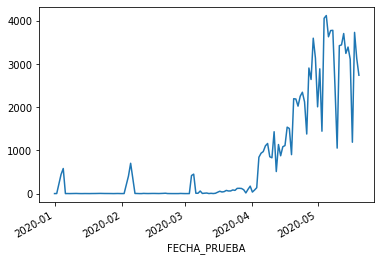

In [22]:
countByDay[('UUID','count')].plot()

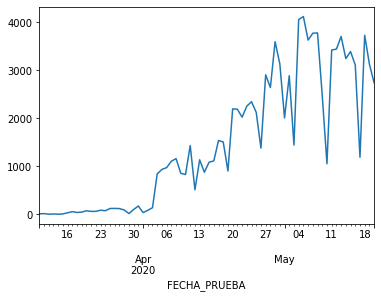

In [25]:
## Menor cantidad de pruebas los días domingos
countByDay[('UUID','count')]['2020-03-10':'2020-05-22'].plot()

In [26]:
# Which ones are the departments that do less tests on sundays
data.groupby(['TIPO_PRUEBA']).agg(['count'])
#PCR 20478
#PR 88187

,UUID,FECHA_NACIMIENTO,SEXO,DEPARTAMENTO,PROVINCIA,DISTRITO,FECHA_PRUEBA
,count,count,count,count,count,count,count
TIPO_PRUEBA,,,,,,,
PCR,20478,20409,20478,20478,20478,20478,20478
PR,88187,84464,81367,88187,88187,88187,88187


In [27]:
dataPruebaCount = data.groupby(['TIPO_PRUEBA','FECHA_PRUEBA'])

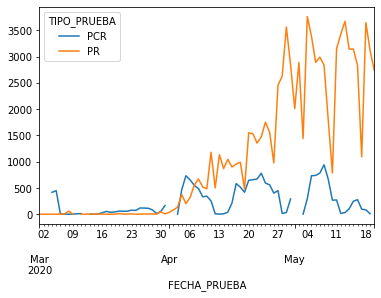

In [28]:
dataPruebaCount.agg(['count']).unstack(level=0)[('UUID','count')]['2020-03-01':].plot()

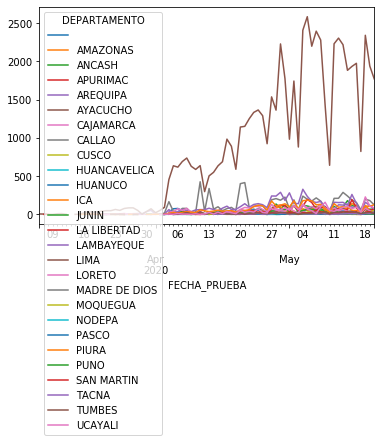

In [29]:
data.groupby(['DEPARTAMENTO','FECHA_PRUEBA']).agg(['count']).unstack(level=0)[('UUID','count')]['2020-03-06':].plot()

In [33]:
data.groupby(['DEPARTAMENTO','FECHA_PRUEBA']).agg(['count']).unstack(level=0)

UUID                                                       \
              count                                                        
DEPARTAMENTO        AMAZONAS ANCASH APURIMAC AREQUIPA AYACUCHO CAJAMARCA   
FECHA_PRUEBA                                                               
2020-01-01      NaN      NaN    NaN      NaN      NaN      NaN       NaN   
2020-01-02      NaN      NaN    NaN      NaN      NaN      NaN       NaN   
2020-01-04     13.0      NaN    2.0      NaN      8.0      2.0       5.0   
2020-01-05     30.0      6.0    9.0      1.0      4.0      3.0      10.0   
2020-01-06      NaN      NaN    NaN      NaN      NaN      NaN       NaN   
2020-01-07      NaN      NaN    NaN      NaN      NaN      NaN       NaN   
2020-01-08      NaN      NaN    NaN      NaN      NaN      NaN       NaN   
2020-01-11      NaN      NaN    NaN      NaN      NaN      NaN       NaN   
2020-01-12      NaN      NaN    NaN      NaN      NaN      NaN       NaN   
2020-01-13      NaN      NaN    NaN      NaN      NaN      NaN       NaN   
2020-01-14      NaN      NaN    NaN      NaN      NaN      NaN       NaN   
2020-01-15      NaN      NaN    NaN      NaN      NaN      NaN       NaN   
2020-01-17      NaN      NaN    NaN      NaN      NaN      NaN       NaN   
2020-01-18      NaN      NaN    NaN      NaN      NaN      NaN       NaN   
2020-01-20      NaN      NaN    NaN      NaN      NaN      NaN       NaN   
2020-01-21      NaN      NaN    NaN      NaN      NaN      NaN       NaN   
2020-01-22      NaN      NaN    NaN      NaN      NaN      NaN       NaN   
2020-01-23      NaN      NaN    NaN      NaN      NaN      NaN       NaN   
2020-01-24      NaN      NaN    NaN      NaN      NaN      NaN       NaN   
2020-01-27      NaN      NaN    NaN      NaN      NaN      NaN       NaN   
2020-01-28      NaN      NaN    NaN      NaN      NaN      NaN       NaN   
2020-01-30      NaN      NaN    NaN      NaN      NaN      NaN       NaN   
2020-02-01      NaN      NaN    NaN      NaN      NaN      NaN       NaN   
2020-02-02      NaN      NaN    NaN      NaN      NaN      NaN       NaN   
2020-02-04     40.0      NaN   13.0      1.0      8.0      1.0       5.0   
2020-02-05     66.0      3.0   16.0      NaN      6.0      3.0       4.0   
2020-02-07      NaN      NaN    NaN      NaN      NaN      NaN       NaN   
2020-02-08      NaN      NaN    NaN      NaN      NaN      NaN       NaN   
2020-02-09      NaN      NaN    NaN      NaN      NaN      NaN       NaN   
2020-02-10      NaN      NaN    NaN      NaN      NaN      NaN       NaN   
2020-02-11      NaN      NaN    NaN      NaN      1.0      NaN       NaN   
2020-02-12      NaN      NaN    NaN      NaN      NaN      NaN       NaN   
2020-02-13      NaN      NaN    NaN      NaN      NaN      NaN       NaN   
2020-02-14      NaN      NaN    NaN      NaN      NaN      NaN       NaN   
2020-02-15      NaN      NaN    NaN      NaN      NaN      NaN       NaN   
2020-02-16      NaN      NaN    1.0      NaN      NaN      NaN       NaN   
2020-02-18      NaN      NaN    NaN      NaN      NaN      NaN       NaN   
2020-02-20      NaN      NaN    NaN      NaN      NaN      NaN       NaN   
2020-02-21      NaN      NaN    NaN      NaN      1.0      NaN       NaN   
2020-02-22      NaN      NaN    NaN      NaN      NaN      NaN       NaN   
2020-02-24      NaN      NaN    NaN      NaN      NaN      NaN       NaN   
2020-02-25      NaN      NaN    NaN      NaN      NaN      NaN       NaN   
2020-02-26      NaN      NaN    NaN      NaN      NaN      NaN       NaN   
2020-02-27      NaN      NaN    NaN      NaN      NaN      NaN       NaN   
2020-02-28      NaN      NaN    NaN      NaN      NaN      NaN       NaN   
2020-02-29      NaN      NaN    NaN      NaN      NaN      NaN       NaN   
2020-03-01      NaN      NaN    NaN      NaN      NaN      NaN       NaN   
2020-03-02      NaN      NaN    NaN      NaN      NaN      NaN       NaN   
2020-03-03      NaN      NaN    NaN      NaN      NaN      NaN 

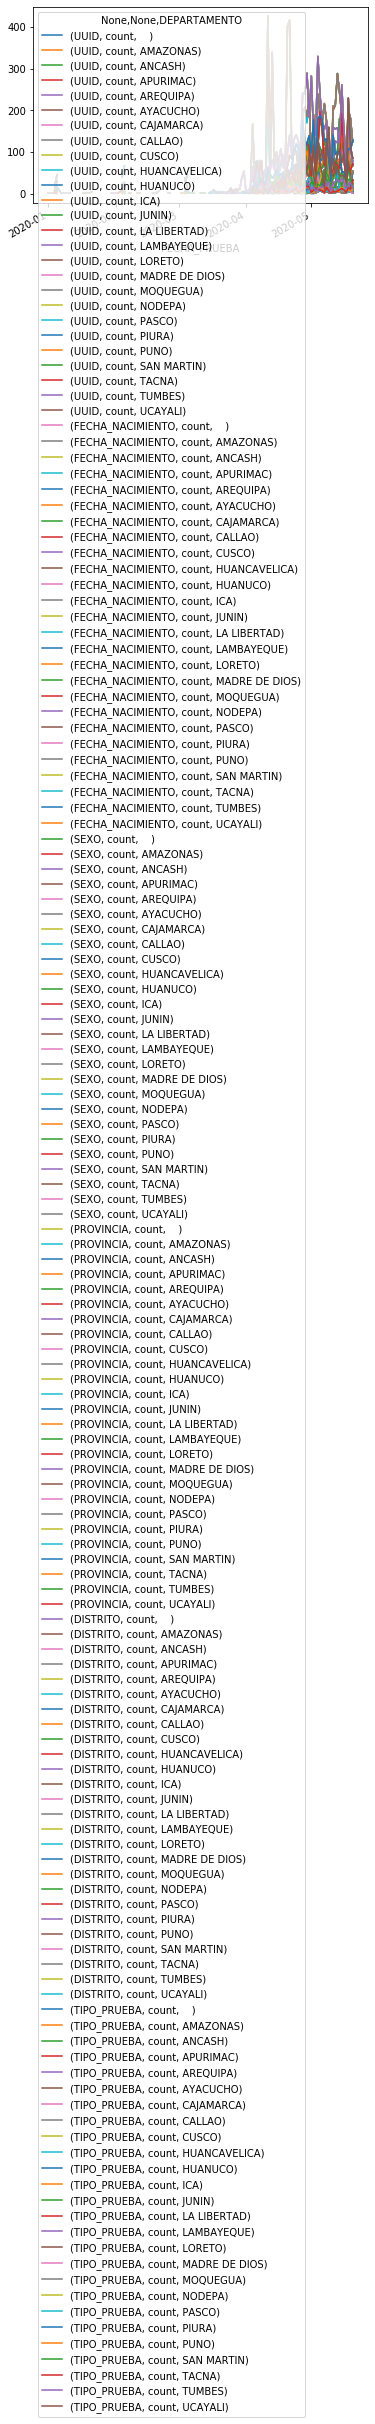

In [36]:
provincias = data[data['DEPARTAMENTO']!='LIMA']
provincias.groupby(['DEPARTAMENTO','FECHA_PRUEBA']).agg(['count']).unstack(level=0).plot()

In [ ]:
## Sería interesante añadir columnas NORTE, SUR, ESTE ...

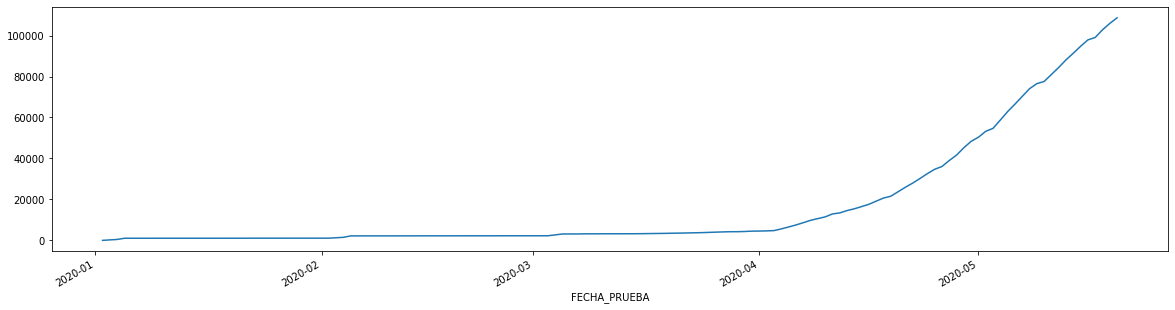

In [263]:
## Empezando a analizar acumulados
countByDay[('UUID','count')].cumsum().plot()